In [1]:
import networkx as nx
import numpy as np
import graph_utils
import graph_utils.visualisation
import networkit as nk

In [2]:
number_of_vertices = 7
graph_path = f"raw_datasets/graph{number_of_vertices}c.g6"

graphs = list(map(nk.nxadapter.nx2nk, nx.read_graph6(graph_path)))
graph = graphs[125]

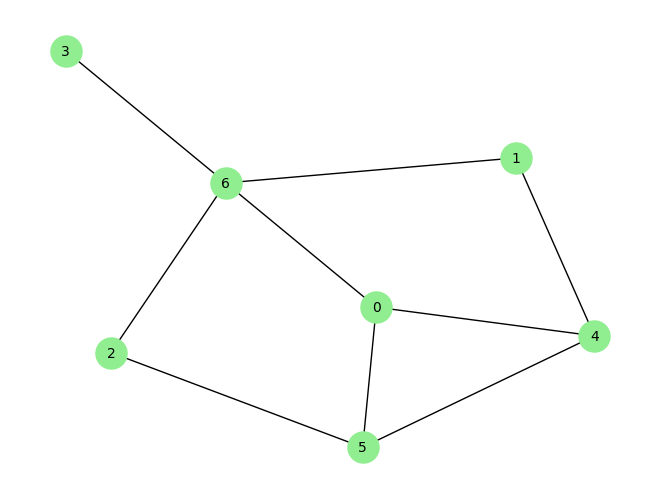

In [3]:
graph_utils.visualisation.plot_graph(graph)

In [4]:
from graph_utils.descriptors import jaccard_index, edge_betweenness, local_degree_score

In [5]:
graph.indexEdges() # In order to compute any descriptor on edge, we need to call this function, otherwise the error is thrown

ji = jaccard_index(graph)
ebc = edge_betweenness(graph)
lds = local_degree_score(graph)

In [6]:
ji, ebc, lds

(array([0.2, 0.2, 0. , 0. , 0. , 0. , 0. , 0. , 0.2]),
 array([0.11904762, 0.16666667, 0.11904762, 0.16666667, 0.14285714,
        0.23809524, 0.21428571, 0.21428571, 0.28571429]),
 [1.0, 0.0, 1.0, 0.0, 0.3690702464285426, 1.0, 1.0, 1.0, 1.0])